<a href="https://colab.research.google.com/github/rahmanole/MDTrAnal/blob/master/notebook/KCUSUM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
from sklearn import metrics
import math
import matplotlib.pyplot as plt
import seaborn as sb
sb.set()
from google.colab import drive
drive.mount('/content/drive')
import os
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/internship works/MDTrAnal/lib')

from codar.oas.MDTrSampler import MDTrSampler, svd_wrapper
!pip install parmed
import parmed
import pandas as pd

Mounted at /content/drive
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.6 MB 4.2 MB/s 
  Created wheel for parmed: filename=ParmEd-3.4.3-cp37-cp37m-linux_x86_64.whl size=807326 sha256=8530f275eb09590bf0b02198e888c02568ae7d15db25185c791bd6c0d9f20263
  Stored in directory: /root/.cache/pip/wheels/2f/26/b3/8cb8da47601e3057598009e903ba5d71e3a8ff08bcbc65cd1e
Successfully built parmed
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:
def gk(x,y):
  return np.exp(-((x-y)**2/2.0))


def mmd(x_n_1, x_n, y_n_1, y_n,delta=0):

    xx = gk(x_n_1, x_n)
    yy = gk(y_n_1, y_n)
    xy = gk(x_n_1, y_n)
    yx = gk(x_n, y_n_1)
  
    return xx + yy - xy - yx - delta

In [6]:
sample_x_1 = np.random.normal(0,1,size=1000)
sample_x_2 = np.random.normal(0,2,size=1000)
sample_x = np.concatenate((sample_x_1, sample_x_2))

# sample_x = np.random.normal(0,1,size=2000)
# sample_x[700] = 9
# sample_x[1000] = 10
# sample_x[1300] = 8

sample_y = np.random.normal(0,1,size=2000)
sample_z = np.random.normal(0,2,size=2000)
sample_w = np.random.normal(0,1,size=2000)


sample_x_CUSUM = np.cumsum(sample_x)
sample_y_CUSUM = np.cumsum(sample_y)

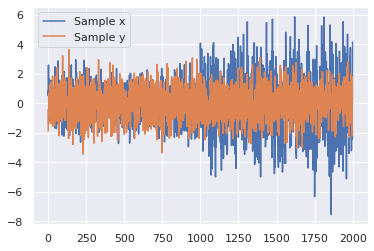

In [7]:
plt.plot(np.arange(0,2000),sample_x, label='Sample x')
plt.plot(np.arange(0,2000),sample_y, label='Sample y')
plt.legend()

In [8]:
def KCUSUM(sample_x,sample_y,h=0,delta=0):
    Z_n = 0
    n = len(sample_x)
    T_kcusum = 0
 

    for i in range(3,n):

        x_0 = sample_x[i-1]
        x_1 = sample_x[i]

        y_0 = sample_y[i-1]
        y_1 = sample_y[i]

        if i%2 == 0:
            v_n = mmd(x_0,x_1,y_0,y_1,delta)
        else:
            v_n = 0

        Z_n += v_n
        if Z_n < 0:
            Z_n = 0

        if Z_n > h: 
            T_kcusum = i

    return T_kcusum 

In [9]:
def plot_time_vs_v(sample_x,sample_y,h,delta=0):
    Z_n = 0
    h >= 0
    n = len(sample_x)
    T_kcusum = []
 

    for i in range(1,n):

        x_0 = sample_x[i-1]
        x_1 = sample_x[i]

        y_0 = sample_y[i-1]
        y_1 = sample_y[i]

        if i%2 == 0:
            v_n = mmd(x_0,x_1,y_0,y_1,delta)
            #print(v_n)
            T_kcusum.append((i,v_n))

    cp = np.array(T_kcusum)
    print(np.mean(cp[:,1]))

    plt.plot(cp[:,0],cp[:,1])
    plt.xlabel('Times')
    plt.ylabel('V_n')

-0.005783456377347139


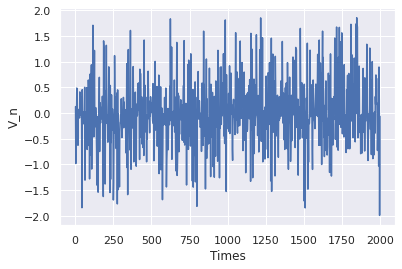

In [10]:
plot_time_vs_v(sample_x,sample_y,10,0.05)

In [11]:
def cp_vs_h(sample_x,sample_y,h_start,h_end,step,delta):
    cps = []
    hs = []
    while h_start<h_end:
        cp = KCUSUM(sample_x,sample_y,h_start,delta)
        hs.append(h_start)
        cps.append(cp)
        h_start += step
        plt.plot(hs,cps)
        plt.xlabel('Value of h')
        plt.ylabel('Change points')

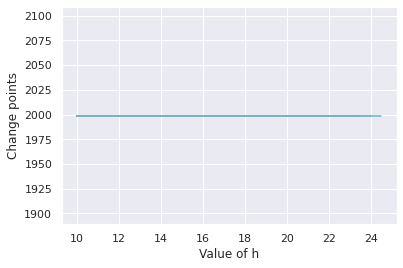

In [12]:
cp_vs_h(sample_x,sample_y,10,25,0.5,0.05)

In [13]:
def plot_time_vs_z(sample_x,sample_y,h,delta=0):
    Z_n = 0
    h >= 0
    n = len(sample_x)
    T_kcusum = []
    #values_Z_n = []
 

    for i in range(1,n):

        x_0 = sample_x[i-1]
        x_1 = sample_x[i]

        y_0 = sample_y[i-1]
        y_1 = sample_y[i]

        if i%2 == 0:
            v_n = mmd(x_0,x_1,y_0,y_1,delta)
            #print(v_n)
        else:
            v_n = 0

        Z_n += v_n
        #print('value of z_n',Z_n)
        if Z_n < 0:
            Z_n = 0

        #if Z_n > h: 
        T_kcusum.append((i,Z_n))

            #break
    cp = np.array(T_kcusum)
    print(np.mean(cp[:,1]))
    plt.plot(cp[:,0],cp[:,1])
    plt.ylabel('Value of Z')
    plt.xlabel('Time Points')


12.255465145627396


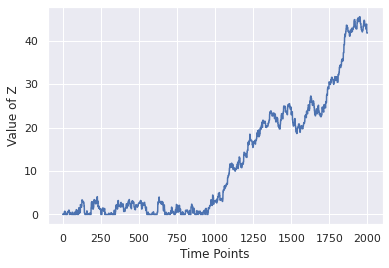

In [14]:
plot_time_vs_z(sample_x,sample_y,0,0.05)

17.34339890694231


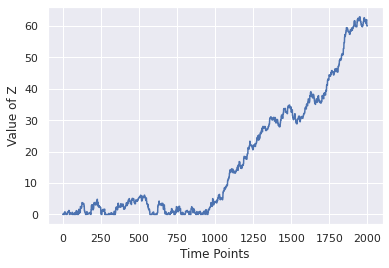

In [15]:
plot_time_vs_z(sample_x,sample_y,0,0.015)

5.891787822184585


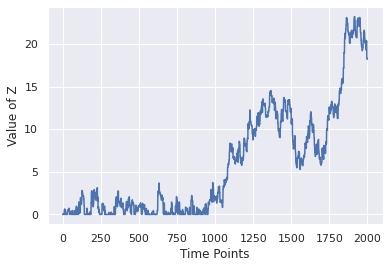

In [16]:
plot_time_vs_z(sample_x,sample_y,0,0.095)

In [17]:
KCUSUM(sample_x,sample_y,10,0.05)

1999

In [18]:
y = np.arange(2000)
def cdp_by_slope(x,y):
    ms = []
    for i in range(1,len(x)):
        dx = x[i-1] - x[i]
        dy = y[i-1] - y[i]

        m = dy/dx
        ms.append(m)

    return ms

#cdp_by_slope(sample_x,sample_y)

### Testing with real data

In [19]:
incoming = np.random.normal(0, 1, size=(300, 3))
ref = incoming.copy()

## injecting 150 change points
rand_index = np.random.randint(0,300,size=150)
for i in range(len(rand_index)):
    ind = rand_index[i]
    incoming[ind] = np.random.randint(0,100,size=(3))

In [20]:
#Ut, St, VTt = svd_wrapper(incoming, 2, method='random')

In [21]:
#Ut2, St2, VTt2 = svd_wrapper(ref, 2, method='random')

In [22]:
## took the sum of x,y,z cordinates like: (x+y+z)/3
incoming = [sum(ar)/3 for ar in incoming]
ref = [sum(ar)/3 for ar in ref]

In [23]:
KCUSUM(incoming,ref,6,0.05)

299

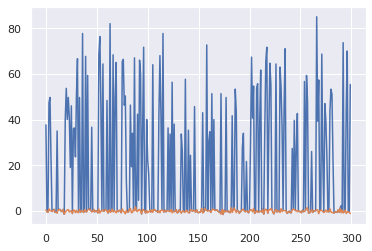

In [24]:
plt.plot(np.arange(300),incoming)
plt.plot(np.arange(300),ref)

In [25]:
i = 3
j = 0
y = []
x = []

while i <= 3.5:
    i+=0.01
    j+= 0.05
    x.append(j)
    y.append(i)


while i >= 3.25:
    i-=0.01
    j+= 0.05
    x.append(j)
    y.append(i)

while j >= 2.75:
    i -= 0.01
    j -= 0.05
    x.append(j)
    y.append(i)

while j >= 2.0:
    i+=0.01
    j-= 0.05
    x.append(j)
    y.append(i)

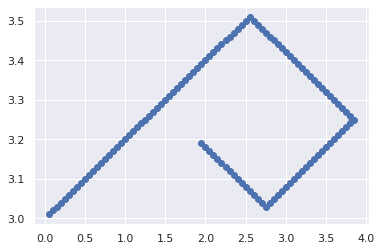

In [26]:
plt.scatter(x,y)

## Change point detection based on Based on angle

In [4]:
## this method detects the change points
def cpd_on_slop(x,y):
    m = (y[1] - y[0])/(x[1]-x[0])
    m_temp = 0
    cpds = []
    for i in range(1,len(x)):
        m_temp = m
        m = (y[i] - y[i-1])/(x[i]-x[i-1])
        if abs(m-m_temp)>0.1:
            print(math.degrees(math.atan(m)))
            cpds.append((x[i],y[i]))
    return cpds

In [28]:
cpds = cpd_on_slop(x,y)
cpds

-11.30993247402002
11.30993247402002
-11.30993247402002


[(2.5999999999999988, 3.4999999999999893),
 (3.7999999999999945, 3.239999999999995),
 (2.6999999999999984, 3.039999999999999)]

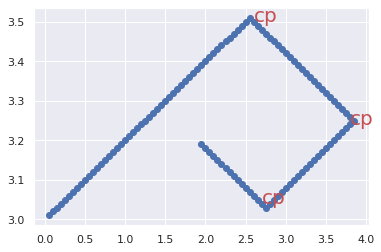

In [29]:
plt.scatter(x,y)
for point in cpds:
    plt.text(point[0],point[1],'cp',c='r',fontsize=20)
plt.show()

## CPD for manifold data where changes are not abrupt

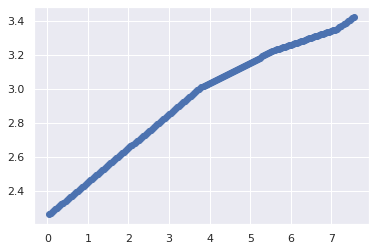

In [30]:
i = 2.25
j = 0
y = []
x = []
while i <= 3.0:
    i+=0.01
    j+= 0.05
    x.append(j)
    y.append(i)

while i <= 3.23:
    i+=0.006
    j+= 0.05
    x.append(j)
    y.append(i)

while i <= 3.30:
    i+=0.004
    j+= 0.05
    x.append(j)
    y.append(i)

while i <= 3.35:
    i+=0.004
    j+= 0.05
    x.append(j)
    y.append(i)

while i <= 3.42:
    i+=0.009
    j+= 0.05
    x.append(j)
    y.append(i)

plt.scatter(x,y)

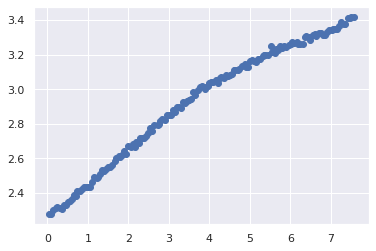

In [31]:
fake_data = pd.DataFrame(list(zip(x, y)),columns=['x','y'])
fake_data.head()

## Adding gaussian noise 
mu, sigma = 0, 0.01 
noise = np.random.normal(mu, sigma, [151,2]) 
fake_data = fake_data + noise
fake_data.head()

x = fake_data.x
y = fake_data.y
plt.scatter(fake_data.x,fake_data.y)

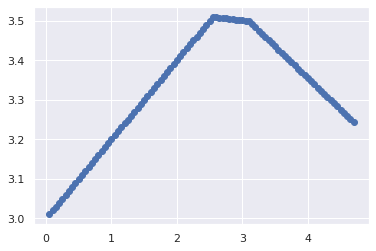

In [51]:
i = 3
j = 0
y = []
x = []

while i <= 3.5:
    i+=0.01
    j+= 0.05
    x.append(j)
    y.append(i)


while i >= 3.4999:
    i-=0.001
    j+= 0.05
    x.append(j)
    y.append(i)

while i >= 3.25:
    i-=0.008
    j+= 0.05
    x.append(j)
    y.append(i)

plt.scatter(x,y)

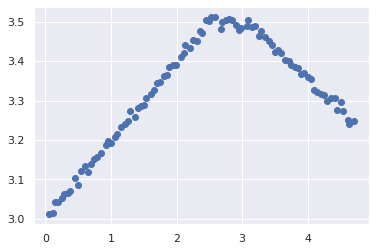

In [52]:
fake_data = pd.DataFrame(list(zip(x, y)),columns=['x','y'])
fake_data.head()

## Adding gaussian noise 
mu, sigma = 0, 0.01 
noise = np.random.normal(mu, sigma, [94,2]) 
fake_data = fake_data + noise
fake_data.head()

x = fake_data.x
y = fake_data.y
plt.scatter(fake_data.x,fake_data.y)

In [50]:
#KCUSUM(x,y,-1,0.05)

In [48]:
print((x[93],y[93]))

(4.718416139353231, 3.226246563171493)


[(2.5999999999999988, 3.4999999999999893), (3.7999999999999945, 3.239999999999995), (2.6999999999999984, 3.039999999999999)]


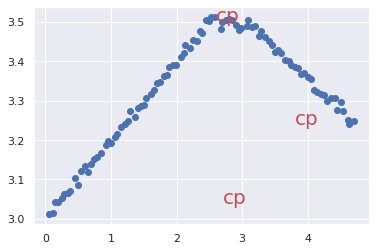

In [53]:
def cpd_on_slop(x,y):
    m = (y[1] - y[0])/(x[1]-x[0])
    m_last = 0 ## this m holds last slop
    m_sum = 0
    cpds = []
    for i in range(1,len(x)):
        m_last = m 
        m = (y[i] - y[i-1])/(x[i]-x[i-1]) ## this one is current slop
        m_diff = m-m_last
        m_sum += m_diff
        if m_sum>1.5 or m_sum<-1.5:
            cpds.append((x[i],y[i],m_sum))
            m_sum = 0
    return cpds
print(cpds)
plt.scatter(x,y)
for point in cpds:
    plt.text(point[0],point[1],'cp',c='r',fontsize=20)
plt.show()